**Variable Correlation**

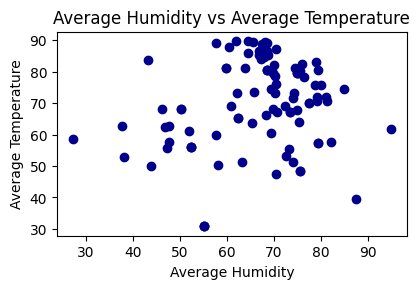

Average Humidity vs Average Temperature: 
r = 0.207
CI = [0.011, 0.388]
p-value = 0.039



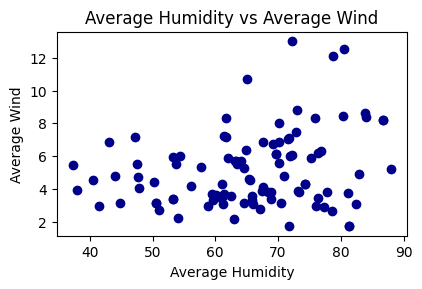

Average Humidity vs Average Wind: 
r = 0.252
CI = [0.058, 0.427]
p-value = 0.012



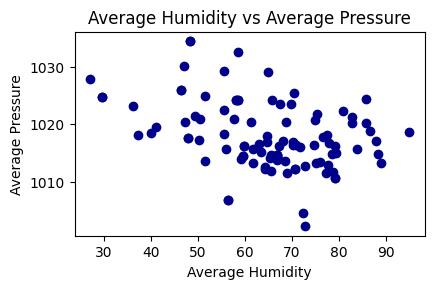

Average Humidity vs Average Pressure: 
r = -0.391
CI = [-0.546, -0.211]
p-value = 0.0



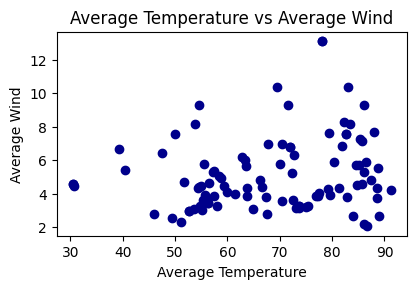

Average Temperature vs Average Wind: 
r = 0.192
CI = [-0.005, 0.374]
p-value = 0.056



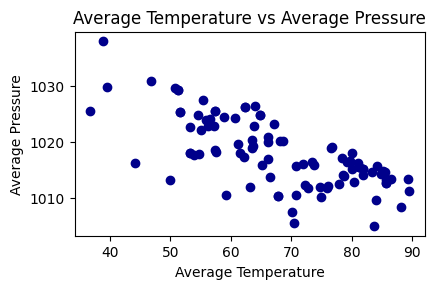

Average Temperature vs Average Pressure: 
r = -0.701
CI = [-0.789, -0.585]
p-value = 0.0



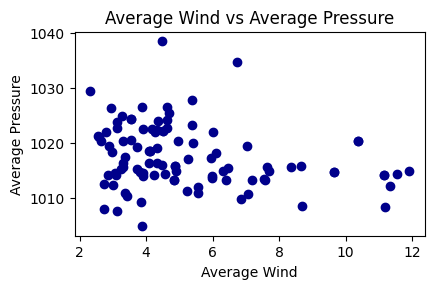

Average Wind vs Average Pressure: 
r = -0.238
CI = [-0.415, -0.044]
p-value = 0.017



In [45]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import random
import math

# Variables and labels
variables = ['avg_humidity', 'avg_temperature', 'avg_wind', 'avg_pressure']
labels = ['Average Humidity', 'Average Temperature', 'Average Wind', 'Average Pressure']

# Replace 'file_path.csv' with the path to your CSV file
file_path = 'houston-aqi-2010-2021.csv'

# Load the CSV file into a Pandas dataframe
df = pd.read_csv(file_path)

# Looping through variables list
for i, variable in enumerate(variables):
    for j, other_variable in enumerate(variables):

        if i < j:

              # 100 Random and Unique rows
            random_indices = np.random.choice(df.index, 100, replace=False)

            # Extract values from two separate columns using the selected indices
            A = df.loc[random_indices, variables[i]]
            B = df.loc[random_indices, variables[j]]

            x_var_name = variables[i].split('_')[1].capitalize()
            y_var_name = variables[j].split('_')[1].capitalize()

            # Merge both 100 random and unique rows into one list
            df2 = pd.DataFrame(np.column_stack([A, B]), columns=[i, j])

            # x and y variable
            x = df2[i]
            y = df2[j]
            # correlation coefficient r
            corr_matrix = df2.corr()
            r = round(corr_matrix[i][j], 3)

            #print("r = " + str(r))
            # scatterplot
            fig, ax = plt.subplots(figsize=(5, 3))
            fig.subplots_adjust(bottom=0.2, left=0.2)
            plt.scatter(x, y, c='DarkBlue')
            plt.title("Average " + x_var_name + " vs " + "Average " + y_var_name)
            ax.set_xlabel("Average " + x_var_name)
            ax.set_ylabel("Average " + y_var_name + "")
            plt.show()

            # sample size
            n = 100

            # 95% Confidence Level, Alpha = 0.05 which is z score of 1.96
            z = 1.96

            # CI equation --> CI = r' ± Z1-α/2 * 1/squareroot(n-3)'

            stderr = 1.0 / math.sqrt(n - 3)  # stand deviation 1/sqrt(n-3)
            delta = z * stderr  # Multiply by the Z-score
            lower = math.tanh(math.atanh(r) - delta)  # lower limit
            upper = math.tanh(math.atanh(r) + delta)  # upper limit

            print(labels[i] + " vs " + labels[j] + ": ")
            print("r = " + str(r))
            print('CI = [' + str(round(lower, 3)) + ', ' + str(round(upper, 3)) + ']')


            # Merge both 100 random and unique rows into one list
            df2 = pd.DataFrame(np.column_stack([A, B]), columns=[i, j])

            # correlation coefficient r and P-value
            pearsonr(x, y)
            r2 = round(pearsonr(x, y)[0], 3)
            pvalue = round(pearsonr(x, y)[1], 3)

            #print(labels[i] + " vs " + labels[j] + ": ")
            print("p-value = " + str(pvalue) + '\n')


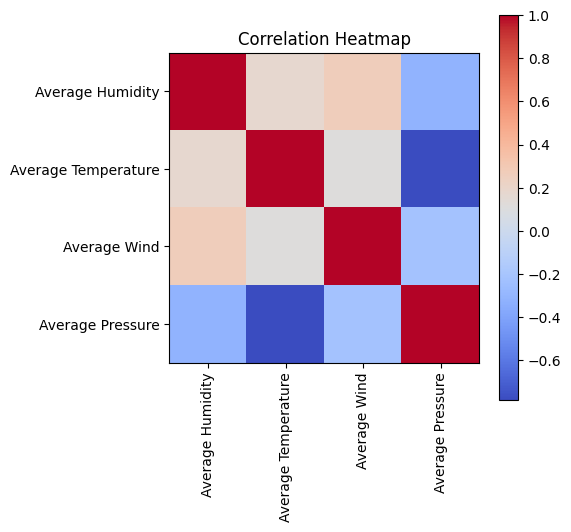

                     Average Humidity  Average Temperature  Average Wind  \
Average Humidity                1.000                0.176         0.265   
Average Temperature             0.176                1.000         0.114   
Average Wind                    0.265                0.114         1.000   
Average Pressure               -0.316               -0.784        -0.214   

                     Average Pressure  
Average Humidity               -0.316  
Average Temperature            -0.784  
Average Wind                   -0.214  
Average Pressure                1.000  


In [46]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import random
import math

# Variables and labels
variables = ['avg_humidity', 'avg_temperature', 'avg_wind', 'avg_pressure']
labels = ['Average Humidity', 'Average Temperature', 'Average Wind', 'Average Pressure']

# Replace 'file_path.csv' with the path to your CSV file
file_path = 'houston-aqi-2010-2021.csv'

# Load the CSV file into a Pandas dataframe
df = pd.read_csv(file_path)

# Looping through variables list
for i, variable in enumerate(variables):
    for j, other_variable in enumerate(variables):

        # compare variables
        if i < j:
            random_indices = np.random.choice(df.index, 100, replace=False)

            # Extract values from the selected indices
            A = df.loc[random_indices, variables[0]]
            B = df.loc[random_indices, variables[1]]
            C = df.loc[random_indices, variables[2]]
            D = df.loc[random_indices, variables[3]]

            x_var_name = variables[i].split('_')[1].capitalize()
            y_var_name = variables[j].split('_')[1].capitalize()


# Merge both 100 unique rows into one list
df2 = pd.DataFrame(np.column_stack([A, B, C, D]), columns=[labels[0], labels[1],
                                                      labels[2], labels[3]])

# Calculate correlation matrix
corr_matrix = df2.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(5, 5))
plt.title('Correlation Heatmap')
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation='vertical')
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.show()
print(round(corr_matrix, 3))

